In [5]:
#PyPlからultralyticsパッケージをインストール
!pip install ultralytics

In [6]:
import tensorflow as tf

# TensorFlowがGPUを認識しているか確認
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")


2023-11-19 22:04:54.665387: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-19 22:04:54.665421: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-19 22:04:54.665449: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-19 22:04:54.671595: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-19 22:04:55.598254: W tensorflow/compiler/

Default GPU Device: /device:GPU:0


2023-11-19 22:04:56.451667: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-19 22:04:56.503766: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-19 22:04:56.503983: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [15]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image




image 1/1 /home/yasumasa-tezuka/NeuroDive_日揮インターン/intern_tree_number_github/tree_number_intern/tree_images/0648.jpg: 480x640 (no detections), 5.9ms
Speed: 9.2ms preprocess, 5.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/yasumasa-tezuka/NeuroDive_日揮インターン/intern_tree_number_github/tree_number_intern/tree_images/0378.jpg: 448x640 (no detections), 7.0ms
Speed: 1.4ms preprocess, 7.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/yasumasa-tezuka/NeuroDive_日揮インターン/intern_tree_number_github/tree_number_intern/tree_images/0416.jpg: 448x640 (no detections), 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/yasumasa-tezuka/NeuroDive_日揮インターン/intern_tree_number_github/tree_number_intern/tree_images/0234.jpg: 640x448 1 chair, 6.0ms
Speed: 1.6ms preprocess, 6.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 448)


ValueError: not enough values to unpack (expected at least 2, got 1)

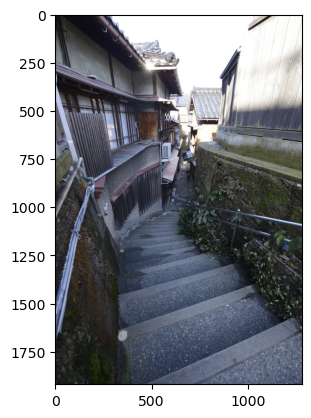

In [16]:
for path in image_paths:
    results = model(path)
    
    tree_count = 0  # 各画像ごとの木のカウントをリセット

    # 画像の読み込み
    img = Image.open(path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # 'results'はおそらくResultsオブジェクトのリスト
    for result in results:
        # バウンディングボックスとクラスIDを含む検出結果を取得
        detections = result.boxes

        for det in detections:
            # バウンディングボックスの座標、確信度、クラスIDを取得
            *xyxy, conf, cls = det
            x1, y1, x2, y2 = xyxy

            if int(cls) == tree_class_id:
                tree_count += 1
                # バウンディングボックスを描画
                rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rect)

    # 結果の保存
    tree_counts[path] = tree_count

    # 描画した画像を保存
    base_name = os.path.basename(path)  # 元のファイル名を取得
    plt.savefig(f'results_{base_name}')  # 元のファイル名を使って保存
    plt.close()